# Partie Google Trends - Pytrends

In [3]:
#installation de la bibliothèque pytrends (version 4.8.0)
!pip install pytrends

In [5]:
import pandas as pd                        
from pytrends.request import TrendReq

In [6]:
#connection à google
pytrends = TrendReq(hl='fr-FR', tz=60)

In [12]:
#création du payload
kw_list = ['Microsoft', 'Activision Blizzard']

#pour avoir le plus de données possible, nous ne préciserons pas de catégories pour l'instant
#parametre gprop à voir car par défaut sur les recherches google mais peut être configurer sur les news (différences entre attentes des utilisateurs users et tendance réel ???)
pytrends.build_payload(kw_list, timeframe='2022-01-17 2022-02-06', geo='FR')

In [33]:
#Interest By Region
df = pytrends.interest_by_region(resolution='CITY')
print(len(df))
df.head(22)

22


,Microsoft,Activision Blizzard
geoName,,
Alsace,87,13
Aquitaine,99,1
Auvergne,96,4
Basse-Normandie,90,10
Bourgogne,96,4
Bretagne,97,3
Centre-Val de Loire,96,4
Champagne-Ardenne,96,4
Corse,100,0


<AxesSubplot:xlabel='geoName'>

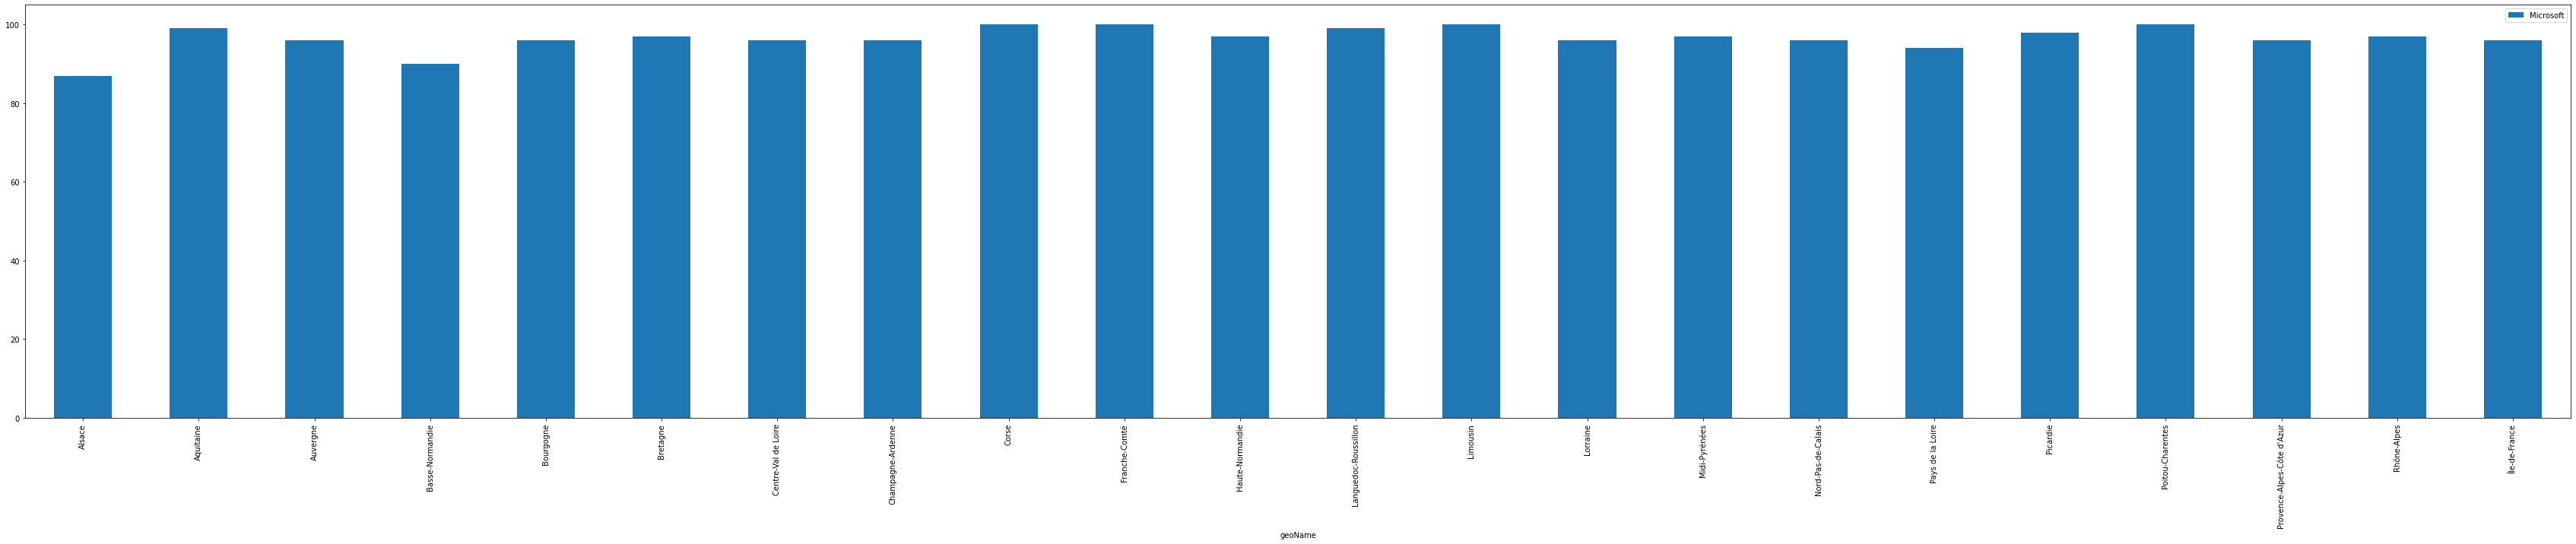

In [41]:
#visualisation Microsoft
#double-cliquez sur le graph pour zoomer
df.reset_index().plot(x='geoName', y='Microsoft', figsize=(60, 10), kind = 'bar')

<AxesSubplot:xlabel='geoName'>

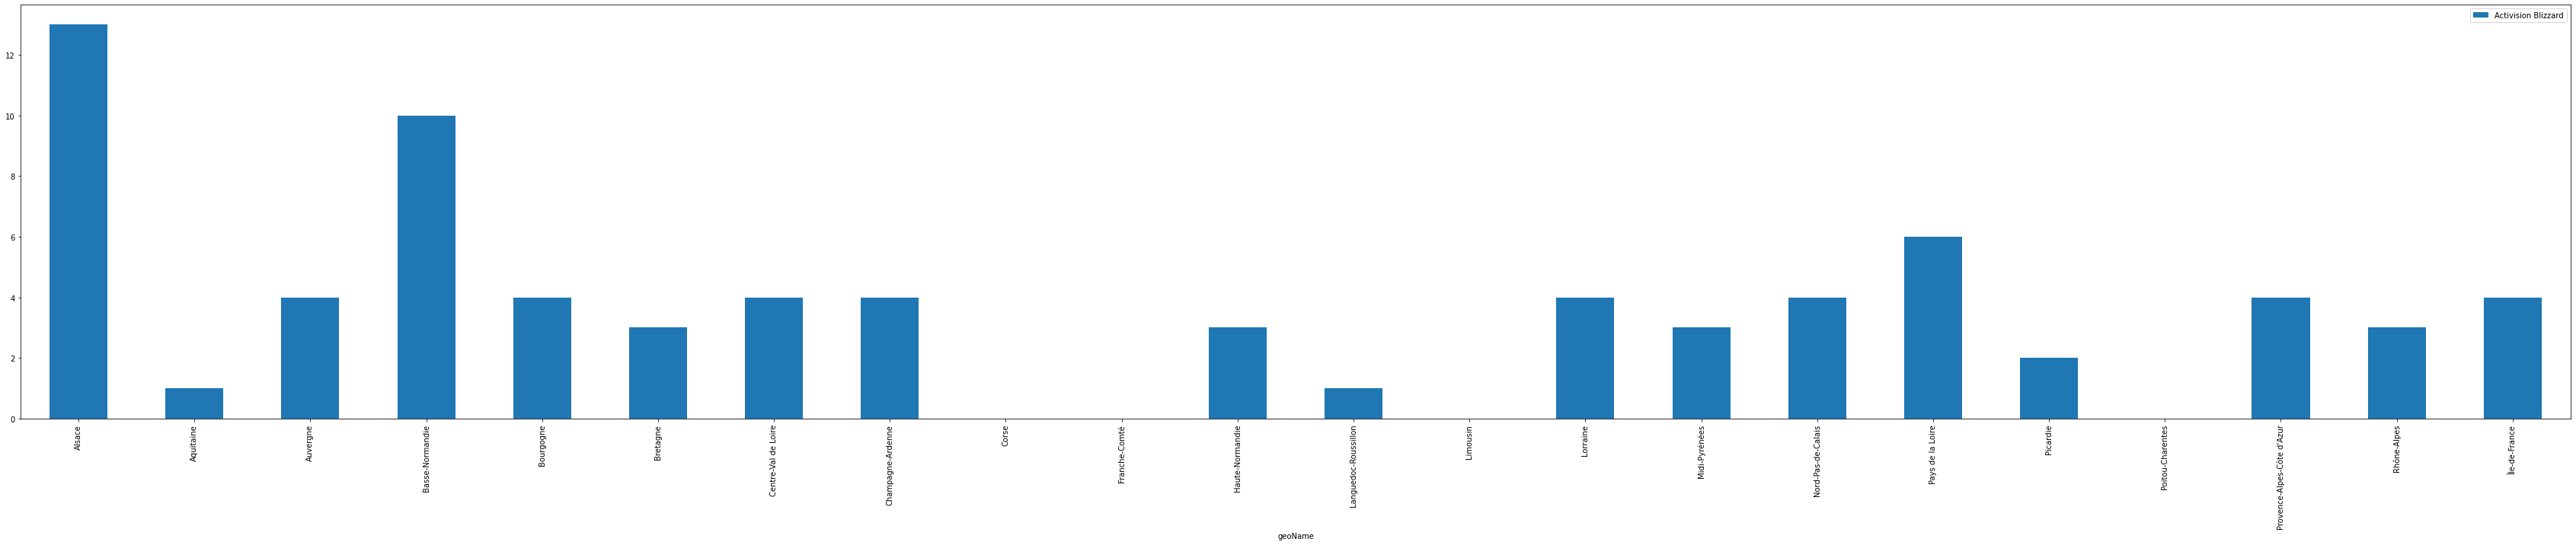

In [42]:
#visualisation Activision Blizzard
#double-cliquez sur le graph pour zoomer
df.reset_index().plot(x='geoName', y='Activision Blizzard', figsize=(60, 10), kind = 'bar')

In [45]:
#interest_over_time permet de voir l'engouement de ces deux mots clés selon la plage temporelle défini
pytrends.interest_over_time()

,Microsoft,Activision Blizzard,isPartial
date,,,
2022-01-17,51,1,False
2022-01-18,100,22,False
2022-01-19,75,6,False
2022-01-20,65,2,False
2022-01-21,53,1,False
2022-01-22,37,2,False
2022-01-23,38,1,False
2022-01-24,55,0,False
2022-01-25,70,0,False


### Related topics

In [54]:
#related topics
#dans ce cas précis, nous n'avons pas de données, essayons de séparer Microsoft et A.B
test = pytrends.related_topics()
test.values()

dict_values([])

In [136]:
RtopM

{'Microsoft': {'top':                    query  value
  0          microsoft 365    100
  1        teams microsoft     65
  2       microsoft office     63
  3       compte microsoft     56
  4      microsoft outlook     28
  5   microsoft activision     27
  6   microsoft office 365     27
  7        microsoft store     25
  8         microsoft word     17
  9      microsoft rewards     15
  10       login microsoft     15
  11       microsoft azure     13
  12      microsoft online     11
  13       cours microsoft     10
  14   microsoft 365 login     10
  15    microsoft blizzard      9
  16        microsoft edge      8
  17      microsoft bourse      6
  18  microsoft visual c++      4,
  'rising':                   query   value
  0  microsoft activision  136250
  1       microsoft azure   67950
  2    microsoft blizzard   48200
  3       cours microsoft     350
  4  microsoft visual c++      70
  5       login microsoft      40}}

In [101]:
kw_list1 = ['Microsoft']
pytrends.build_payload(kw_list1, timeframe='2022-01-17 2022-02-06', geo='FR')
RtopM = pytrends.related_topics()
df1 = RtopM["Microsoft"]["rising"][["value", "topic_title"]]
df1

,value,topic_title
0,175600,Activision Blizzard
1,134450,Activision
2,66850,Blizzard Entertainment
3,48000,Microsoft Dynamics
4,28850,Windows Defender
5,28850,Sony
6,28550,Sûreté
7,19200,Microsoft Flow
8,18900,Clé de produit
9,18900,"Microsoft Surface Laptop 4 (13.5"")"


In [102]:
df1['Key_words']='Microsoft'
df1

/var/folders/pb/gpbc2h2d0rng041tkfgyccw00000gn/T/ipykernel_2735/4019338906.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df1['Key_words']='Microsoft'


,value,topic_title,Key_words
0,175600,Activision Blizzard,Microsoft
1,134450,Activision,Microsoft
2,66850,Blizzard Entertainment,Microsoft
3,48000,Microsoft Dynamics,Microsoft
4,28850,Windows Defender,Microsoft
5,28850,Sony,Microsoft
6,28550,Sûreté,Microsoft
7,19200,Microsoft Flow,Microsoft
8,18900,Clé de produit,Microsoft
9,18900,"Microsoft Surface Laptop 4 (13.5"")",Microsoft


In [139]:
RtopAB

{'Activision Blizzard': {'rising':     value formattedValue                                               link  \
  0  928250         Record  /trends/explore?q=/m/04sv4&date=2022-01-17+202...   
  1  620450         Record  /trends/explore?q=/m/0qt178q&date=2022-01-17+2...   
  2  154350         Record  /trends/explore?q=/m/0vphbfj&date=2022-01-17+2...   
  3  154350         Record  /trends/explore?q=/m/0t_fv9h&date=2022-01-17+2...   
  
      topic_mid topic_title    topic_type  
  0    /m/04sv4   Microsoft    Entreprise  
  1  /m/0qt178q   Microsoft         Sujet  
  2  /m/0vphbfj    Xbox One  Console xbox  
  3  /m/0t_fv9h        Xbox        Marque  ,
  'top':    value formattedValue  hasData  \
  0    100            100     True   
  1     95             95     True   
  2     90             90     True   
  3     30             30     True   
  4     20             20     True   
  5      5              5     True   
  6      5              5     True   
  
                        

In [103]:
kw_list2 = ['Activision Blizzard']
pytrends.build_payload(kw_list2, timeframe='2022-01-17 2022-02-06', geo='FR')
RtopAB = pytrends.related_topics()
df2 = RtopAB["Activision Blizzard"]["rising"][["value", "topic_title"]]
df2

,value,topic_title
0,928250,Microsoft
1,620450,Microsoft
2,154350,Xbox One
3,154350,Xbox


In [105]:
df2['Key_words']='Activision Blizzard'
df2

/var/folders/pb/gpbc2h2d0rng041tkfgyccw00000gn/T/ipykernel_2735/1216254308.py:1: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  df2['Key_words']='Activision Blizzard'


,value,topic_title,Key_words
0,928250,Microsoft,Activision Blizzard
1,620450,Microsoft,Activision Blizzard
2,154350,Xbox One,Activision Blizzard
3,154350,Xbox,Activision Blizzard


In [112]:
df3 = pd.concat([df1,df2], ignore_index=True)
df3.sort_values("value", ascending=False)

,value,topic_title,Key_words
21,928250,Microsoft,Activision Blizzard
22,620450,Microsoft,Activision Blizzard
0,175600,Activision Blizzard,Microsoft
23,154350,Xbox One,Activision Blizzard
24,154350,Xbox,Activision Blizzard
1,134450,Activision,Microsoft
2,66850,Blizzard Entertainment,Microsoft
3,48000,Microsoft Dynamics,Microsoft
5,28850,Sony,Microsoft
4,28850,Windows Defender,Microsoft


### Related queries

In [137]:
pytrends.build_payload(kw_list1, timeframe='2022-01-17 2022-02-06', geo='FR')
RqueM = pytrends.related_queries()
RqueM["Microsoft"]

{'top':                    query  value
 0          microsoft 365    100
 1        teams microsoft     65
 2       microsoft office     63
 3       compte microsoft     56
 4      microsoft outlook     28
 5   microsoft activision     27
 6   microsoft office 365     27
 7        microsoft store     25
 8         microsoft word     17
 9      microsoft rewards     15
 10       login microsoft     15
 11       microsoft azure     13
 12      microsoft online     11
 13       cours microsoft     10
 14   microsoft 365 login     10
 15    microsoft blizzard      9
 16        microsoft edge      8
 17      microsoft bourse      6
 18  microsoft visual c++      4,
 'rising':                   query   value
 0  microsoft activision  136250
 1       microsoft azure   67950
 2    microsoft blizzard   48200
 3       cours microsoft     350
 4  microsoft visual c++      70
 5       login microsoft      40}

Les données sont identiques entre les related topics et les related queries pour Microsoft

In [138]:
pytrends.build_payload(kw_list2, timeframe='2022-01-17 2022-02-06', geo='FR')
RqueM = pytrends.related_queries()
RqueM["Activision Blizzard"]

{'top':                            query  value
 0  microsoft activision blizzard    100,
 'rising':                            query   value
 0  microsoft activision blizzard  691450}

Les données pour Activision Blizzard entre les topics et les queries sont différentes

### Google Keyword Suggestions

In [129]:
# Get Google Keyword Suggestions
keywords = pytrends.suggestions(keyword='Microsoft')
dfs = pd.DataFrame(keywords)
dfs['Key_words']='Microsoft'

In [126]:
keywords1 = pytrends.suggestions(keyword='Activision Blizzard')
dfs1 = pd.DataFrame(keywords1)
dfs1['Key_words']='Activision Blizzard'

In [130]:
dfsF = pd.concat([dfs,dfs1], ignore_index=True)
dfsF.sort_values(["type", "Key_words"], ascending=False)
dfsF.drop(columns= "mid")   # Cette colonne ne sert pas notre analyse

,title,type,Key_words
0,Microsoft,Entreprise,Microsoft
1,Microsoft,Sujet,Microsoft
2,Microsoft 365,Sujet,Microsoft
3,Microsoft Teams,Application,Microsoft
4,Microsoft OneDrive,Application,Microsoft
5,Activision Blizzard,Développeur de jeux vidéo,Activision Blizzard
6,Evil Genius,Jeu vidéo,Activision Blizzard
7,Die Hard : Piège de cristal,Jeu vidéo,Activision Blizzard
8,Nexus: The Jupiter Incident,Jeu vidéo,Activision Blizzard
9,DreamWorks Super Star Kartz,Jeu vidéo,Activision Blizzard


# Partie Twitter Trends - Twint

In [140]:
!pip install twint

  Using cached twint-2.1.20.tar.gz (31 kB)
     |████████████████████████████████| 574 kB 2.2 MB/s eta 0:00:01
     |████████████████████████████████| 97 kB 3.6 MB/s eta 0:00:01
     |████████████████████████████████| 124 kB 5.2 MB/s eta 0:00:01
     |████████████████████████████████| 385 kB 2.9 MB/s eta 0:00:01
     |████████████████████████████████| 118 kB 8.0 MB/s eta 0:00:01
  Using cached fake-useragent-0.1.11.tar.gz (13 kB)
  Using cached googletransx-2.4.2.tar.gz (13 kB)
     |████████████████████████████████| 75 kB 4.2 MB/s eta 0:00:011
     |████████████████████████████████| 121 kB 6.0 MB/s eta 0:00:01
     |████████████████████████████████| 49 kB 6.8 MB/s  eta 0:00:01
  Created wheel for twint: filename=twint-2.1.20-py3-none-any.whl size=33929 sha256=918f03c0de4cf10fbcfada284d53ca4b1e3a1b8d6b7bc4342fb9b9d159a13699
  Stored in directory: /Users/valettehugo/Library/Caches/pip/wheels/4e/80/ea/5b82b5140b7dec857ec0bbfe908193ebf2e5d7f2ebee297519
  Created wheel for fake-useragent: 

In [141]:
!pip install pandas nltk matplotlib textblob collection wordcloud

     |████████████████████████████████| 636 kB 1.7 MB/s eta 0:00:01
  Using cached collection-0.1.6.tar.gz (5.0 kB)
  Using cached wordcloud-1.8.1.tar.gz (220 kB)
  Created wheel for collection: filename=collection-0.1.6-py3-none-any.whl size=5115 sha256=db5690b34444dd65abb96e95d9fe9f38487566d437261c1aa67d5528b6022105
  Stored in directory: /Users/valettehugo/Library/Caches/pip/wheels/3b/e0/fe/8e68dd2243f4e4741fd3950f2dbeb2fdf4b604767fde39598f
  Created wheel for wordcloud: filename=wordcloud-1.8.1-cp38-cp38-macosx_10_9_x86_64.whl size=160342 sha256=875dbf3d0e4c45253ea9b406ee425e6fb02bdcac4acbcf15e31562e667fbb418
  Stored in directory: /Users/valettehugo/Library/Caches/pip/wheels/4d/3f/0d/a2ba9b7895c9f1be89018b3141c3df3d4f9c786c882ccfbc3b
Successfully built collection wordcloud


In [148]:
import nest_asyncio

nest_asyncio.apply()

In [150]:
import twint

c = twint.Config()
c.Username = "Toulouse"
c.Followers = True
c.output = "./Toulouse.csv"
twint.run.Followers(c)

/Users/valettehugo/opt/anaconda3/envs/Math_DS/lib/python3.8/site-packages/aiohttp/client_reqrep.py:305: RuntimeWarning: coroutine 'Twint.main' was never awaited
  self.update_host(url)
CRITICAL:root:twint.get:User:'NoneType' object is not subscriptable
CRITICAL:root:twint.feed:Follow:IndexError


In [168]:
...

Ellipsis

In [155]:
!pip install openpyxl

In [8]:
import re
import nltk
from nltk.corpus import stopwords
from nltk import ngrams
import pandas as pd 
import matplotlib.pyplot as plt
import textblob 
import collection 
from wordcloud import WordCloud
import numpy as np
from PIL import Image
from os import path

In [2]:
#Suppression des éléments inutiles
def suppinut(texte):
    texte = texte.lower()
    texte = texte.replace('\n', ' ')
    texte = ' '.join(texte.split())
    texte = re.sub(r'\@\w+',' ',texte)
    texte = re.sub(r'\#\w+',' ',texte)
    
    return texte

In [3]:
#nettoyage (token, non-alpha, stop words, ...)
def process_text(texte):
    clean = ''
    texte = suppinut(texte)
    
    #texte = re.sub('[^A-Za-z]', ' ', texte.lower())
    tokenized_texte = nltk.word_tokenize(texte)
    
    stop_words = stopwords.words('french')
    
    
    clean_texte = [
    word for word in tokenized_texte
    if word not in stop_words ]
    if len(clean_texte) > 0:
        clean = ' '.join(clean_texte)
    else:
        clean = '_'
    return clean

In [4]:
Data = pd.read_excel('test.xlsx')
Data['etape1'] = Data['search'].apply(lambda x:process_text(x))
Data.to_csv('./test_clean.csv', index=False)

In [16]:
#lecture du csv 
#A MODIFIER
dfA = pd.read_csv('./test_clean.csv')
#champs clean => liste de mot
temp=' '.join(dfA['etape1'].tolist())
def f1(temp, x):
    n = x
    twograms = ngrams(temp.split(), n)
    
    return twograms

dfb = pd.DataFrame({"grams": f1(temp, 2)})

dfb["grams"]=dfb["grams"].map(lambda x:' '.join(x))


dfb["count"] = 1
dfbF = dfb.groupby(["grams"]).sum()

dfbF = dfbF.sort_values('count', ascending=False)

print(dfbF)
"""
#importation du png qui servira pour le mask (N&B) 
#A MODIFIER
wine_mask = np.array(Image.open("./s&f.png"))

#reshape du mask pour éviter les erreur de géométrie et améliorer la détection de la figure
wine_mask = wine_mask.reshape((wine_mask.shape[0],-1), order='F')
#Remplacement des 0 par 255 pour créer le masque à l'intérieur duquel seront placé les mots
wine_mask[wine_mask == 0] = 255
# # Transformation du mask en un tableau :
transformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)

# Create a word cloud image
wc = WordCloud(width=1000,height=1000, background_color="white", max_words=1000, 
	 contour_width=10,min_font_size = 10, contour_color='firebrick', min_word_length=2)
# Generate a wordcloud
wc.generate(temp)

# store to file 
#A MODIFIER
#wc.to_file("./s&f_word.png")

# show
plt.figure(figsize=[10,10])
plt.imshow(wc, interpolation='bilinear')
plt.axis("off")
plt.show()
"""

                    count
grams                    
personnes âgées         7
. ’                     7
, ’                     5
’ ehpad                 3
) .                     3
...                   ...
diverses actions        1
dix prochaines          1
domicile personnes      1
don 150                 1
→ tribune               1

[769 rows x 1 columns]


'\n#importation du png qui servira pour le mask (N&B) \n#A MODIFIER\nwine_mask = np.array(Image.open("./s&f.png"))\n\n#reshape du mask pour éviter les erreur de géométrie et améliorer la détection de la figure\nwine_mask = wine_mask.reshape((wine_mask.shape[0],-1), order=\'F\')\n#Remplacement des 0 par 255 pour créer le masque à l\'intérieur duquel seront placé les mots\nwine_mask[wine_mask == 0] = 255\n# # Transformation du mask en un tableau :\ntransformed_wine_mask = np.ndarray((wine_mask.shape[0],wine_mask.shape[1]), np.int32)\n\n# Create a word cloud image\nwc = WordCloud(width=1000,height=1000, background_color="white", max_words=1000, \n\t contour_width=10,min_font_size = 10, contour_color=\'firebrick\', min_word_length=2)\n# Generate a wordcloud\nwc.generate(temp)\n\n# store to file \n#A MODIFIER\n#wc.to_file("./s&f_word.png")\n\n# show\nplt.figure(figsize=[10,10])\nplt.imshow(wc, interpolation=\'bilinear\')\nplt.axis("off")\nplt.show()\n'